# Credit Card Fraud Detection

## Imports

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [18]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
print(df['Class'].value_counts())  # 0 = legit, 1 = fraud

(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


In [19]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)

df_balanced = pd.concat([fraud, non_fraud])
df_balanced = df_balanced.sample(frac=1, random_state=42)

df_balanced['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

## Train-Test Split

In [20]:
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Preprocessing

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models Training

### Logistic Regression

In [22]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
print("Logistic Regression Report:")
print(classification_report(y_test, lr_preds))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        99
           1       0.95      0.92      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



### XGB Classifier

In [23]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)
print("XGBoost Report:")
print(classification_report(y_test, xgb_preds))

XGBoost Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        99
           1       0.97      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



### Random Forest Classifier

In [24]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)
print("Random Forest Report:")
print(classification_report(y_test, rf_preds))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        99
           1       0.96      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



## Visualize Feature Importance

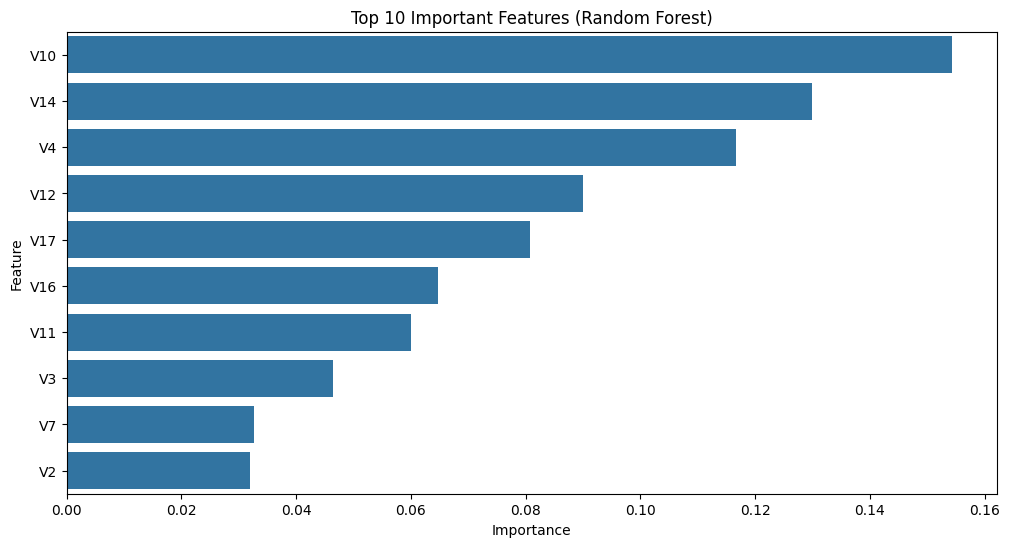

In [25]:
importances = rf.feature_importances_
features = X.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

In [26]:
preds = xgb_model.predict(X_test_scaled[:10])
print(f"Predictions for first 10 samples:")
print(f"(1=Fraud, 0=Not): {preds}")

Predictions for first 10 samples:
(1=Fraud, 0=Not): [1 1 0 1 0 0 1 1 0 0]
